In [1]:
# @title Dowloand the demo data
# Let's start with loading the image for segmentation

!wget https://polybox.ethz.ch/index.php/s/ddFUpadTSRgDycr/download -O image_examples.zip
!unzip image_examples.zip
%cd /content/for_segmentation/
%cd /content

--2024-10-22 07:32:03--  https://polybox.ethz.ch/index.php/s/ddFUpadTSRgDycr/download
Resolving polybox.ethz.ch (polybox.ethz.ch)... 129.132.71.243
Connecting to polybox.ethz.ch (polybox.ethz.ch)|129.132.71.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3054155 (2.9M) [application/zip]
Saving to: ‘image_examples.zip’

image_examples.zip  100%[===================>]   2.91M  3.51MB/s    in 0.8s    

2024-10-22 07:32:04 (3.51 MB/s) - ‘image_examples.zip’ saved [3054155/3054155]

Archive:  image_examples.zip
   creating: for_segmentation/
  inflating: for_segmentation/tool.jpg  
  inflating: for_segmentation/.DS_Store  
  inflating: for_segmentation/coffee_tools.jpg  
  inflating: for_segmentation/notebook.jpg  
  inflating: for_segmentation/hemostata_pencil.jpg  
  inflating: for_segmentation/books_tools.jpg  
  inflating: for_segmentation/qr_code.jpg  
  inflating: for_segmentation/hemostat.jpg  
/content/for_segmentation
/content


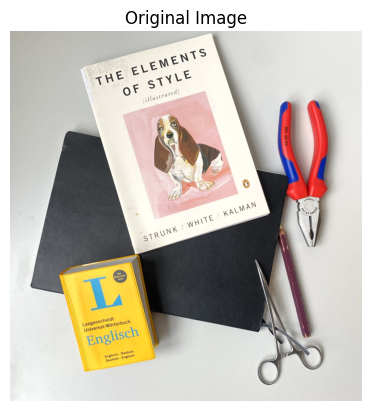

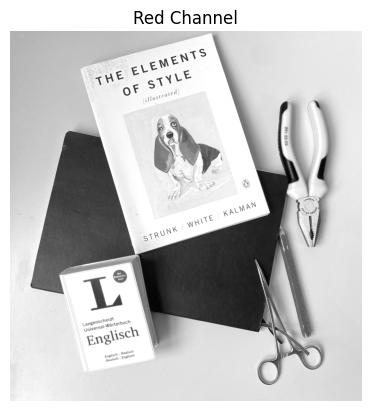

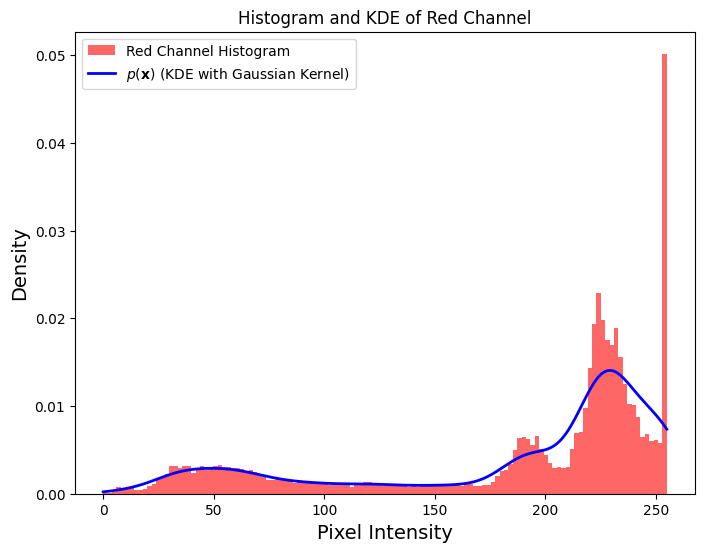

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

# Load the image
image_path = '/content/for_segmentation/books_tools.jpg'
image = cv2.imread(image_path)

# Convert image from BGR (OpenCV default) to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plot full image
plt.figure()
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis('off')
plt.savefig("original.jpg", dpi=300)
plt.show()

# plot red channel only
plt.figure()
plt.title("Red Channel")
plt.imshow(image_rgb[:, :, 0], cmap='gray')
plt.axis('off')
plt.savefig("red_channel.jpg", dpi=300)
plt.show()

# Extract one channel (e.g., the red channel)
red_channel = image_rgb[::8, ::8, 0].ravel()  # Flatten the red channel to 1D

# Plot the histogram of the red channel
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(red_channel, bins=128, density=True, alpha=0.6, color='r', label='Red Channel Histogram')

# Prepare the data for Kernel Density Estimation (KDE)
red_channel = red_channel.reshape(-1, 1)  # Reshape for sklearn (expecting 2D array)

# Fit a KDE model with Gaussian kernel
h = 2 # how changing this affects the estimated density?
kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(red_channel)  # Bandwidth is the smoothing parameter

# Create values for which we want the density estimate
x_vals = np.linspace(0, 255, 1000).reshape(-1, 1)

# Evaluate the KDE model (returns log density, so we exponentiate it)
log_density = kde.score_samples(x_vals)
density = np.exp(log_density)

# Plot the KDE result
plt.plot(x_vals, density, color='blue', label='$p(\mathbf{x})$ (KDE with Gaussian Kernel)', lw=2)

# Labels and titles
plt.title('Histogram and KDE of Red Channel')
#plt.title('Histogram of Red Channel')

plt.xlabel('Pixel Intensity',  fontsize=14)
plt.ylabel('Density',  fontsize=14)
plt.legend()

# Show the plot
plt.savefig("hist_density.jpg", dpi=300)
plt.show()